# Potential Module Tutorial

This tutorial will show you how to use the potential module to load pre-processed potential files. It creates an interpolation object for the potentials in terms of the control voltages used to form the potentials. These interpolation objects allow us to determine the potential at an arbitrary gate voltage.

## 1. Load the relevant module

The file nextnano_3D takes in a folder of pre-processed potential files. These files have to follow the naming convention 'TYPE_C1NAME_C1VAL_C2NAME_C2VAL_..._CNNAME_CNVAL.txt' where TYPE = 'Uxy' or 'Ez'.  The C#NAME indicates the name for the control voltages and C#VAL indicates the corresponding control voltage value. The TYPE flag indicates whether you are loading potentials or electric field files.

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

import qudipy.potential as pot

import numpy as np
import matplotlib.pyplot as plt

## 2. Define which files to load and load them

We need to specify the name of the folder that contains the potential files as well as the names for each potential file.

In [2]:
# Enter the name of the folder where the potential files are located. 
# If this argument is not supplied it will assume the current working directory.
pot_dir = os.path.dirname(os.getcwd()) + '/qudipy/potential/Sliced_potentials/'

# Specify the control voltage names (C#NAME as mentioned above)
ctrl_names = ['V1','V2','V3','V4','V5']

# Specify the control voltage values you wish to load.
# The cartesian product of all these supplied voltages will be loaded and MUST exist in the directory.
V1 = [0.1]
V2 = [0.2, 0.22, 0.24, 0.26]
V3 = [0.2, 0.22, 0.24, 0.26]
V4 = [0.2, 0.22, 0.24, 0.26]
V5 = [0.1]
# Add all voltage values to a list
ctrl_vals = [V1, V2, V3, V4, V5]    

# Now load the potentials.  
# load_files returns a dictionary of all the information loaded
loaded_data = pot.load_files(ctrl_vals, ctrl_names, f_type='pot', f_dir=pot_dir)

# We can check the fields of the dictionary returned to see what is stored.
loaded_data.keys()

dict_keys(['coords', 'ctrl_vals', 'potentials'])

## 3. Store x and y coordinates in a GridParameters object

In [3]:
# It's a bit convoluted, but the x and y coordinates are
# stored in the potentialL object returned from load_files.
# With those values, we will build a GridParameters object.
coord = loaded_data['coords']
x = coord[0]
y = coord[1]

# Construct a GridParameters object
gparams = pot.GridParameters(x,y)

## 4. Build the interpolation object

In [4]:
# Now building the interpolation object is trivial.
pot_interp = pot.build_interpolator(loaded_data)

## 5. Do some potential interpolation
Now let's show how we can actually do an interpolation with this object.

In [5]:
# Define a voltage vector you wish to interpolate the potential at
v_vec = [0.1, 0.2, 0.23, 0.2, 0.1]
# As a note.. You can also ignore the singleton dimensions we defining the voltage vector
# i.e. v_vec = [0.2, 0.23, 0.2]
pot_interp(v_vec)

array([[-2.15955   , -2.15952773, -2.15951608, ..., -2.15951608,
        -2.15952773, -2.15955   ],
       [-2.15957292, -2.15955063, -2.15954608, ..., -2.15954608,
        -2.15955063, -2.15957292],
       [-2.15970039, -2.15968054, -2.15967961, ..., -2.15967961,
        -2.15968054, -2.15970039],
       ...,
       [-2.14395796, -2.1439584 , -2.14391109, ..., -2.14391109,
        -2.1439584 , -2.14395796],
       [-2.14387449, -2.14386908, -2.14382175, ..., -2.14382175,
        -2.14386908, -2.14387449],
       [-2.14385   , -2.14383091, -2.14378477, ..., -2.14378477,
        -2.14383091, -2.14385   ]])

You can see what is returned is the 2D potential landscape of the device in meshgrid format (y,x).  We can plot these potentials now to see how they look like and check that everything makes sense.

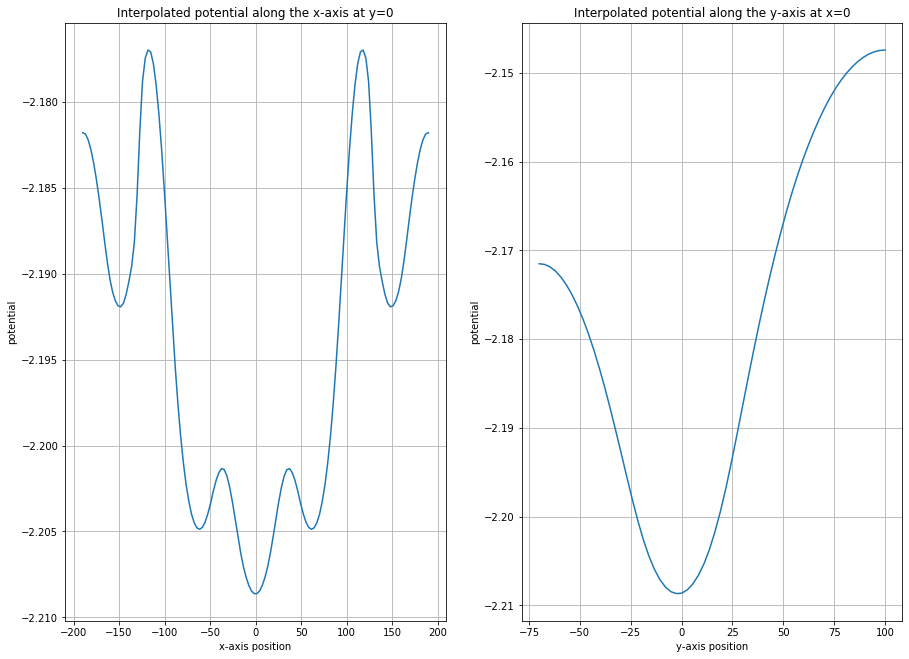

In [6]:
# First let's get the potential of interest again.
# Notice how I am omititng the singleton dimensions in the voltage vector.
int_pot = pot_interp([0.25, 0.25, 0.25])

# Next let's plot the 1D potential along the y=0 axis of the 2D potential
# We can use the nice little helper utility function.
import qudipy.utils as utils
y_idx = utils.find_nearest(gparams.y, 0)[0]
# We'll do the same thing for x=0 as well
x_idx = utils.find_nearest(gparams.x, 0)[0]

f = plt.figure(figsize=(15,11))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# potential along x-axis at y=0
ax1.plot(gparams.x, int_pot[y_idx,:])
ax1.set(xlabel='x-axis position', ylabel='potential',
       title='Interpolated potential along the x-axis at y=0')
ax1.grid()

# potential along y-axis at x=0
ax2.plot(gparams.y, int_pot[:,x_idx])
ax2.set(xlabel='y-axis position', ylabel='potential',
       title='Interpolated potential along the y-axis at x=0')
ax2.grid()

These potentials look like what we expect from the nextnano simulations.  Let's do a few more plots though of the potential at different gate voltages to check that the interpolator actually varies the potential correctly.

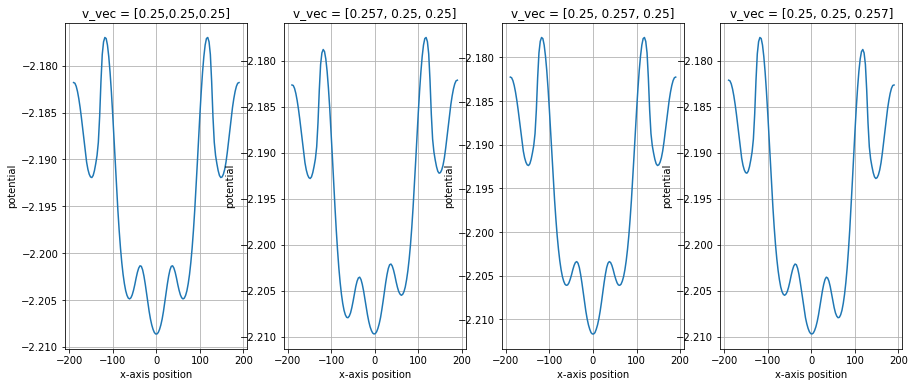

In [7]:
# Let's do 4 different interpolations
v_vec1 = [0.25, 0.25, 0.25]
v_vec2 = [0.257, 0.25, 0.25]
v_vec3 = [0.25, 0.257, 0.25]
v_vec4 = [0.25, 0.25, 0.257]

f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(141)
ax2 = f.add_subplot(142)
ax3 = f.add_subplot(143)
ax4 = f.add_subplot(144)

# potential for first voltage vector
int_pot = pot_interp(v_vec1)
ax1.plot(gparams.x, int_pot[y_idx,:])
ax1.set(xlabel='x-axis position', ylabel='potential',
       title='v_vec = [0.25,0.25,0.25]')
ax1.grid()

# potential for first voltage vector
int_pot = pot_interp(v_vec2)
ax2.plot(gparams.x, int_pot[y_idx,:])
ax2.set(xlabel='x-axis position', ylabel='potential',
       title='v_vec = [0.257, 0.25, 0.25]')
ax2.grid()

# potential for first voltage vector
int_pot = pot_interp(v_vec3)
ax3.plot(gparams.x, int_pot[y_idx,:])
ax3.set(xlabel='x-axis position', ylabel='potential',
       title='v_vec = [0.25, 0.257, 0.25]')
ax3.grid()

# potential for first voltage vector
int_pot = pot_interp(v_vec4)
ax4.plot(gparams.x, int_pot[y_idx,:])
ax4.set(xlabel='x-axis position', ylabel='potential',
       title='v_vec = [0.25, 0.25, 0.257]')
ax4.grid()